# Imports

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.style.use("seaborn")

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

# Analyse lexicale

On code directement une fonction faisant le travail requis en utilisant les techniques vues dans le fichier details.

In [9]:
def analyse(discours):
    """
    Fonction prenant une chaine de caractères et retournant une série associant mot et nombre d'utilisation dans l'ordre décroissant.
    
    discours : str
    """
    mots = [mot.lower() for ligne in discours.splitlines() for mot in ligne.split()]
    
    motif = re.compile("[\.,!\"']")
    mots_sans_ponctuation = [re.sub(motif, "", mot) for mot in mots]
    
    compteur = dict()
    for mot in mots_sans_ponctuation:
        compteur[mot] = compteur.get(mot, 0) + 1
    
    return pd.Series(compteur).sort_values(ascending=False)

On teste la fonction sur un texte court avant de passer à de vrais discours.

In [10]:
texte = """
Juste un petit texte, pour vérifier que la fonction "discours" marche bien.
Ce qui serait préférable; en tout cas avant de s'attaquer à de vrais discours.
Il faut noté que la fonction sera forcément perfectible.
"""

In [11]:
analyse(texte)

que            2
la             2
de             2
fonction       2
discours       2
perfectible    1
qui            1
un             1
petit          1
texte          1
pour           1
vérifier       1
marche         1
bien           1
ce             1
serait         1
forcément      1
préférable;    1
en             1
tout           1
cas            1
avant          1
sattaquer      1
à              1
vrais          1
il             1
faut           1
noté           1
sera           1
juste          1
dtype: int64

Normalement il faudrait ajuster la fonction à cause de la présence de "sattaquer" dans la liste des mots, mais comme on va analyser des textes en anglais cette question précise ne sera pas cruciale.

On va récupérer des discours sur ce [site](https://millercenter.org/the-presidency/presidential-speeches), d'abord via des copier-coller.

In [12]:
trump_discours = """
Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and my fellow Americans:

Less than 1 year has passed since I first stood at this podium, in this majestic chamber, to speak on behalf of the American People—and to address their concerns, their hopes, and their dreams. That night, our new Administration had already taken swift action. A new tide of optimism was already sweeping across our land.

Each day since, we have gone forward with a clear vision and a righteous mission—to make America great again for all Americans.

Over the last year, we have made incredible progress and achieved extraordinary success. We have faced challenges we expected, and others we could never have imagined. We have shared in the heights of victory and the pains of hardship. We endured floods and fires and storms. But through it all, we have seen the beauty of America’s soul, and the steel in America’s spine.

Each test has forged new American heroes to remind us who we are, and show us what we can be.

We saw the volunteers of the “Cajun Navy,” racing to the rescue with their fishing boats to save people in the aftermath of a devastating hurricane.

We saw strangers shielding strangers from a hail of gunfire on the Las Vegas strip.

We heard tales of Americans like Coast Guard Petty Officer Ashlee Leppert, who is here tonight in the gallery with Melania. Ashlee was aboard one of the first helicopters on the scene in Houston during Hurricane Harvey. Through 18 hours of wind and rain, Ashlee braved live power lines and deep water, to help save more than 40 lives. Thank you, Ashlee.

We heard about Americans like firefighter David Dahlberg. He is here with us too. David faced down walls of flame to rescue almost 60 children trapped at a California summer camp threatened by wildfires.

To everyone still recovering in Texas, Florida, Louisiana, Puerto Rico, the Virgin Islands, California, and everywhere else—we are with you, we love you, and we will pull through together.

Some trials over the past year touched this chamber very personally. With us tonight is one of the toughest people ever to serve in this House—a guy who took a bullet, almost died, and was back to work three and a half months later: the legend from Louisiana, Congressman Steve Scalise.

We are incredibly grateful for the heroic efforts of the Capitol Police Officers, the Alexandria Police, and the doctors, nurses, and paramedics who saved his life, and the lives of many others in this room.

In the aftermath of that terrible shooting, we came together, not as Republicans or Democrats, but as representatives of the people. But it is not enough to come together only in times of tragedy. Tonight, I call upon all of us to set aside our differences, to seek out common ground, and to summon the unity we need to deliver for the people we were elected to serve.

Over the last year, the world has seen what we always knew: that no people on Earth are so fearless, or daring, or determined as Americans. If there is a mountain, we climb it. If there is a frontier, we cross it. If there is a challenge, we tame it. If there is an opportunity, we seize it.

So let us begin tonight by recognizing that the state of our Union is strong because our people are strong.

And together, we are building a safe, strong, and proud America.

Since the election, we have created 2.4 million new jobs, including 200,000 new jobs in manufacturing alone. After years of wage stagnation, we are finally seeing rising wages.

Unemployment claims have hit a 45-year low. African American unemployment stands at the lowest rate ever recorded, and Hispanic American unemployment has also reached the lowest levels in history.

Small business confidence is at an all-time high. The stock market has smashed one record after another, gaining $8 trillion in value. That is great news for Americans’ 401k, retirement, pension, and college savings accounts.

And just as I promised the American people from this podium 11 months ago, we enacted the biggest tax cuts and reforms in American history.

Our massive tax cuts provide tremendous relief for the middle class and small businesses.

To lower tax rates for hardworking Americans, we nearly doubled the standard deduction for everyone. Now, the first $24,000 earned by a married couple is completely tax-free. We also doubled the child tax credit.

A typical family of four making $75,000 will see their tax bill reduced by $2,000k—slashing their tax bill in half.

This April will be the last time you ever file under the old broken system—and millions of Americans will have more take-home pay starting next month.

We eliminated an especially cruel tax that fell mostly on Americans making less than $50,000 a year—forcing them to pay tremendous penalties simply because they could not afford government-ordered health plans. We repealed the core of disastrous Obamacare—the individual mandate is now gone.

We slashed the business tax rate from 35 percent all the way down to 21 percent, so American companies can compete and win against anyone in the world. These changes alone are estimated to increase average family income by more than $4,000.

Small businesses have also received a massive tax cut, and can now deduct 20 percent of their business income.

Here tonight are Steve Staub and Sandy Keplinger of Staub Manufacturing—a small business in Ohio. They have just finished the best year in their 20-year history. Because of tax reform, they are handing out raises, hiring an additional 14 people, and expanding into the building next door.

One of Staub’s employees, Corey Adams, is also with us tonight. Corey is an all-American worker. He supported himself through high school, lost his job during the 2008 recession, and was later hired by Staub, where he trained to become a welder. Like many hardworking Americans, Corey plans to invest his tax‑cut raise into his new home and his two daughters’ education. Please join me in congratulating Corey.

Since we passed tax cuts, roughly 3 million workers have already gotten tax cut bonuses—many of them thousands of dollars per worker. Apple has just announced it plans to invest a total of $350 billion in America, and hire another 20,000 workers.

This is our new American moment. There has never been a better time to start living the American Dream.

So to every citizen watching at home tonight—no matter where you have been, or where you come from, this is your time. If you work hard, if you believe in yourself, if you believe in America, then you can dream anything, you can be anything, and together, we can achieve anything.

Tonight, I want to talk about what kind of future we are going to have, and what kind of Nation we are going to be. All of us, together, as one team, one people, and one American family.

We all share the same home, the same heart, the same destiny, and the same great American flag.

Together, we are rediscovering the American way.

In America, we know that faith and family, not government and bureaucracy, are the center of the American life. Our motto is “in God we trust.”

And we celebrate our police, our military, and our amazing veterans as heroes who deserve our total and unwavering support.

Here tonight is Preston Sharp, a 12-year-old boy from Redding, California, who noticed that veterans’ graves were not marked with flags on Veterans Day. He decided to change that, and started a movement that has now placed 40,000 flags at the graves of our great heroes. Preston: a job well done.

Young patriots like Preston teach all of us about our civic duty as Americans. Preston’s reverence for those who have served our Nation reminds us why we salute our flag, why we put our hands on our hearts for the pledge of allegiance, and why we proudly stand for the national anthem.

Americans love their country. And they deserve a Government that shows them the same love and loyalty in return.

For the last year we have sought to restore the bonds of trust between our citizens and their Government.

Working with the Senate, we are appointing judges who will interpret the Constitution as written, including a great new Supreme Court Justice, and more circuit court judges than any new administration in the history of our country.

We are defending our Second Amendment, and have taken historic actions to protect religious liberty.

And we are serving our brave veterans, including giving our veterans choice in their healthcare decisions. Last year, the Congress passed, and I signed, the landmark VA Accountability Act. Since its passage, my Administration has already removed more than 1,500 VA employees who failed to give our veterans the care they deserve—and we are hiring talented people who love our vets as much as we do.

I will not stop until our veterans are properly taken care of, which has been my promise to them from the very beginning of this great journey.

All Americans deserve accountability and respect—and that is what we are giving them. So tonight, I call on the Congress to empower every Cabinet Secretary with the authority to reward good workers—and to remove Federal employees who undermine the public trust or fail the American people.

In our drive to make Washington accountable, we have eliminated more regulations in our first year than any administration in history.

We have ended the war on American Energy—and we have ended the war on clean coal. We are now an exporter of energy to the world.

In Detroit, I halted Government mandates that crippled America’s autoworkers—so we can get the Motor City revving its engines once again.

Many car companies are now building and expanding plants in the United States—something we have not seen for decades. Chrysler is moving a major plant from Mexico to Michigan; Toyota and Mazda are opening up a plant in Alabama. Soon, plants will be opening up all over the country. This is all news Americans are unaccustomed to hearing—for many years, companies and jobs were only leaving us. But now they are coming back.

Exciting progress is happening every day.

To speed access to breakthrough cures and affordable generic drugs, last year the FDA approved more new and generic drugs and medical devices than ever before in our history.

We also believe that patients with terminal conditions should have access to experimental treatments that could potentially save their lives.

People who are terminally ill should not have to go from country to country to seek a cure—I want to give them a chance right here at home. It is time for the Congress to give these wonderful Americans the “right to try.”

One of my greatest priorities is to reduce the price of prescription drugs. In many other countries, these drugs cost far less than what we pay in the United States. That is why I have directed my Administration to make fixing the injustice of high drug prices one of our top priorities. Prices will come down.

America has also finally turned the page on decades of unfair trade deals that sacrificed our prosperity and shipped away our companies, our jobs, and our Nation’s wealth.

The era of economic surrender is over.

From now on, we expect trading relationships to be fair and to be reciprocal.

We will work to fix bad trade deals and negotiate new ones.

And we will protect American workers and American intellectual property, through strong enforcement of our trade rules.

As we rebuild our industries, it is also time to rebuild our crumbling infrastructure.

America is a nation of builders. We built the Empire State Building in just 1 year—is it not a disgrace that it can now take 10 years just to get a permit approved for a simple road?

I am asking both parties to come together to give us the safe, fast, reliable, and modern infrastructure our economy needs and our people deserve.

Tonight, I am calling on the Congress to produce a bill that generates at least $1.5 trillion for the new infrastructure investment we need.

Every Federal dollar should be leveraged by partnering with State and local governments and, where appropriate, tapping into private sector investment—to permanently fix the infrastructure deficit.

Any bill must also streamline the permitting and approval process—getting it down to no more than two years, and perhaps even one.

Together, we can reclaim our building heritage. We will build gleaming new roads, bridges, highways, railways, and waterways across our land. And we will do it with American heart, American hands, and American grit.

We want every American to know the dignity of a hard day’s work. We want every child to be safe in their home at night. And we want every citizen to be proud of this land that we love.

We can lift our citizens from welfare to work, from dependence to independence, and from poverty to prosperity.

As tax cuts create new jobs, let us invest in workforce development and job training. Let us open great vocational schools so our future workers can learn a craft and realize their full potential. And let us support working families by supporting paid family leave.

As America regains its strength, this opportunity must be extended to all citizens. That is why this year we will embark on reforming our prisons to help former inmates who have served their time get a second chance.

Struggling communities, especially immigrant communities, will also be helped by immigration policies that focus on the best interests of American workers and American families.

For decades, open borders have allowed drugs and gangs to pour into our most vulnerable communities. They have allowed millions of low-wage workers to compete for jobs and wages against the poorest Americans.  Most tragically, they have caused the loss of many innocent lives.

Here tonight are two fathers and two mothers: Evelyn Rodriguez, Freddy Cuevas, Elizabeth Alvarado, and Robert Mickens. Their two teenage daughters—Kayla Cuevas and Nisa Mickens—were close friends on Long Island. But in September 2016, on the eve of Nisa’s 16th Birthday, neither of them came home. These two precious girls were brutally murdered while walking together in their hometown. Six members of the savage gang MS-13 have been charged with Kayla and Nisa’s murders. Many of these gang members took advantage of glaring loopholes in our laws to enter the country as unaccompanied alien minors—and wound up in Kayla and Nisa’s high school.

Evelyn, Elizabeth, Freddy, and Robert:  Tonight, everyone in this chamber is praying for you. Everyone in America is grieving for you. And 320 million hearts are breaking for you. We cannot imagine the depth of your sorrow, but we can make sure that other families never have to endure this pain.

Tonight, I am calling on the Congress to finally close the deadly loopholes that have allowed MS-13, and other criminals, to break into our country. We have proposed new legislation that will fix our immigration laws, and support our ICE and Border Patrol Agents, so that this cannot ever happen again.

The United States is a compassionate nation. We are proud that we do more than any other country to help the needy, the struggling, and the underprivileged all over the world. But as President of the United States, my highest loyalty, my greatest compassion, and my constant concern is for America’s children, America’s struggling workers, and America’s forgotten communities. I want our youth to grow up to achieve great things. I want our poor to have their chance to rise.

So tonight, I am extending an open hand to work with members of both parties—Democrats and Republicans—to protect our citizens of every background, color, religion, and creed. My duty, and the sacred duty of every elected official in this chamber, is to defend Americans—to protect their safety, their families, their communities, and their right to the American Dream. Because Americans are dreamers too.

Here tonight is one leader in the effort to defend our country: Homeland Security Investigations Special Agent Celestino Martinez—he goes by CJ. CJ served 15 years in the Air Force before becoming an ICE agent and spending the last 15 years fighting gang violence and getting dangerous criminals off our streets. At one point, MS-13 leaders ordered CJ’s murder. But he did not cave to threats or fear. Last May, he commanded an operation to track down gang members on Long Island. His team has arrested nearly 400, including more than 220 from MS-13.

CJ: Great work. Now let us get the Congress to send you some reinforcements.

Over the next few weeks, the House and Senate will be voting on an immigration reform package.

In recent months, my Administration has met extensively with both Democrats and Republicans to craft a bipartisan approach to immigration reform. Based on these discussions, we presented the Congress with a detailed proposal that should be supported by both parties as a fair compromise—one where nobody gets everything they want, but where our country gets the critical reforms it needs.

Here are the four pillars of our plan:

The first pillar of our framework generously offers a path to citizenship for 1.8 million illegal immigrants who were brought here by their parents at a young age—that covers almost three times more people than the previous administration. Under our plan, those who meet education and work requirements, and show good moral character, will be able to become full citizens of the United States.

The second pillar fully secures the border. That means building a wall on the Southern border, and it means hiring more heroes like CJ to keep our communities safe. Crucially, our plan closes the terrible loopholes exploited by criminals and terrorists to enter our country—and it finally ends the dangerous practice of “catch and release.”

The third pillar ends the visa lottery—a program that randomly hands out green cards without any regard for skill, merit, or the safety of our people. It is time to begin moving towards a merit-based immigration system—one that admits people who are skilled, who want to work, who will contribute to our society, and who will love and respect our country.

The fourth and final pillar protects the nuclear family by ending chain migration. Under the current broken system, a single immigrant can bring in virtually unlimited numbers of distant relatives. Under our plan, we focus on the immediate family by limiting sponsorships to spouses and minor children. This vital reform is necessary, not just for our economy, but for our security, and our future.

In recent weeks, two terrorist attacks in New York were made possible by the visa lottery and chain migration. In the age of terrorism, these programs present risks we can no longer afford.

It is time to reform these outdated immigration rules, and finally bring our immigration system into the 21st century.

These four pillars represent a down-the-middle compromise, and one that will create a safe, modern, and lawful immigration system.

For over 30 years, Washington has tried and failed to solve this problem. This Congress can be the one that finally makes it happen.

Most importantly, these four pillars will produce legislation that fulfills my ironclad pledge to only sign a bill that puts America first. So let us come together, set politics aside, and finally get the job done.

These reforms will also support our response to the terrible crisis of opioid and drug addiction.

In 2016, we lost 64,000 Americans to drug overdoses: 174 deaths per day. Seven per hour. We must get much tougher on drug dealers and pushers if we are going to succeed in stopping this scourge.

My Administration is committed to fighting the drug epidemic and helping get treatment for those in need. The struggle will be long and difficult—but, as Americans always do, we will prevail.

As we have seen tonight, the most difficult challenges bring out the best in America.

We see a vivid expression of this truth in the story of the Holets family of New Mexico. Ryan Holets is 27 years old, and an officer with the Albuquerque Police Department. He is here tonight with his wife Rebecca. Last year, Ryan was on duty when he saw a pregnant, homeless woman preparing to inject heroin. When Ryan told her she was going to harm her unborn child, she began to weep. She told him she did not know where to turn, but badly wanted a safe home for her baby.

In that moment, Ryan said he felt God speak to him: “You will do it—because you can.” He took out a picture of his wife and their four kids. Then, he went home to tell his wife Rebecca. In an instant, she agreed to adopt. The Holets named their new daughter Hope.

Ryan and Rebecca: You embody the goodness of our Nation. Thank you, and congratulations.

As we rebuild America’s strength and confidence at home, we are also restoring our strength and standing abroad.

Around the world, we face rogue regimes, terrorist groups, and rivals like China and Russia that challenge our interests, our economy, and our values. In confronting these dangers, we know that weakness is the surest path to conflict, and unmatched power is the surest means of our defense.

For this reason, I am asking the Congress to end the dangerous defense sequester and fully fund our great military.

As part of our defense, we must modernize and rebuild our nuclear arsenal, hopefully never having to use it, but making it so strong and powerful that it will deter any acts of aggression. Perhaps someday in the future there will be a magical moment when the countries of the world will get together to eliminate their nuclear weapons. Unfortunately, we are not there yet.

Last year, I also pledged that we would work with our allies to extinguish ISIS from the face of the Earth. One year later, I am proud to report that the coalition to defeat ISIS has liberated almost 100 percent of the territory once held by these killers in Iraq and Syria. But there is much more work to be done. We will continue our fight until ISIS is defeated.

Army Staff Sergeant Justin Peck is here tonight. Near Raqqa last November, Justin and his comrade, Chief Petty Officer Kenton Stacy, were on a mission to clear buildings that ISIS had rigged with explosives so that civilians could return to the city.

Clearing the second floor of a vital hospital, Kenton Stacy was severely wounded by an explosion. Immediately, Justin bounded into the booby-trapped building and found Kenton in bad shape. He applied pressure to the wound and inserted a tube to reopen an airway. He then performed CPR for 20 straight minutes during the ground transport and maintained artificial respiration through 2 hours of emergency surgery.

Kenton Stacy would have died if not for Justin’s selfless love for a fellow warrior. Tonight, Kenton is recovering in Texas. Raqqa is liberated. And Justin is wearing his new Bronze Star, with a “V” for “Valor.” Staff Sergeant Peck:  All of America salutes you.

Terrorists who do things like place bombs in civilian hospitals are evil. When possible, we annihilate them. When necessary, we must be able to detain and question them. But we must be clear: Terrorists are not merely criminals. They are unlawful enemy combatants. And when captured overseas, they should be treated like the terrorists they are.

In the past, we have foolishly released hundreds of dangerous terrorists, only to meet them again on the battlefield—including the ISIS leader, al-Baghdadi.

So today, I am keeping another promise. I just signed an order directing Secretary Mattis to reexamine our military detention policy and to keep open the detention facilities at Guantánamo Bay.

I am also asking the Congress to ensure that, in the fight against ISIS and al-Qa’ida, we continue to have all necessary power to detain terrorists—wherever we chase them down.

Our warriors in Afghanistan also have new rules of engagement. Along with their heroic Afghan partners, our military is no longer undermined by artificial timelines, and we no longer tell our enemies our plans.

Last month, I also took an action endorsed unanimously by the Senate just months before: I recognized Jerusalem as the capital of Israel.

Shortly afterwards, dozens of countries voted in the United Nations General Assembly against America’s sovereign right to make this recognition. American taxpayers generously send those same countries billions of dollars in aid every year.

That is why, tonight, I am asking the Congress to pass legislation to help ensure American foreign-assistance dollars always serve American interests, and only go to America’s friends.

As we strengthen friendships around the world, we are also restoring clarity about our adversaries.

When the people of Iran rose up against the crimes of their corrupt dictatorship, I did not stay silent. America stands with the people of Iran in their courageous struggle for freedom.

I am asking the Congress to address the fundamental flaws in the terrible Iran nuclear deal.

My administration has also imposed tough sanctions on the communist and socialist dictatorships in Cuba and Venezuela.

But no regime has oppressed its own citizens more totally or brutally than the cruel dictatorship in North Korea.

North Korea’s reckless pursuit of nuclear missiles could very soon threaten our homeland.

We are waging a campaign of maximum pressure to prevent that from happening.

Past experience has taught us that complacency and concessions only invite aggression and provocation. I will not repeat the mistakes of past administrations that got us into this dangerous position.

We need only look at the depraved character of the North Korean regime to understand the nature of the nuclear threat it could pose to America and our allies.

Otto Warmbier was a hardworking student at the University of Virginia. On his way to study abroad in Asia, Otto joined a tour to North Korea. At its conclusion, this wonderful young man was arrested and charged with crimes against the state. After a shameful trial, the dictatorship sentenced Otto to 15 years of hard labor, before returning him to America last June—horribly injured and on the verge of death. He passed away just days after his return.

Otto’s Parents, Fred and Cindy Warmbier, are with us tonight—along with Otto’s brother and sister, Austin and Greta. You are powerful witnesses to a menace that threatens our world, and your strength inspires us all. Tonight, we pledge to honor Otto’s memory with American resolve.

Finally, we are joined by one more witness to the ominous nature of this regime. His name is Mr. Ji Seong-ho.

In 1996, Seong-ho was a starving boy in North Korea. One day, he tried to steal coal from a railroad car to barter for a few scraps of food. In the process, he passed out on the train tracks, exhausted from hunger. He woke up as a train ran over his limbs. He then endured multiple amputations without anything to dull the pain. His brother and sister gave what little food they had to help him recover and ate dirt themselves—permanently stunting their own growth. Later, he was tortured by North Korean authorities after returning from a brief visit to China. His tormentors wanted to know if he had met any Christians. He had—and he resolved to be free.

Seong-ho traveled thousands of miles on crutches across China and Southeast Asia to freedom. Most of his family followed. His father was caught trying to escape, and was tortured to death.

Today he lives in Seoul, where he rescues other defectors, and broadcasts into North Korea what the regime fears the most—the truth.

Today he has a new leg, but Seong-ho, I understand you still keep those crutches as a reminder of how far you have come. Your great sacrifice is an inspiration to us all.

Seong-ho’s story is a testament to the yearning of every human soul to live in freedom.

It was that same yearning for freedom that nearly 250 years ago gave birth to a special place called America. It was a small cluster of colonies caught between a great ocean and a vast wilderness. But it was home to an incredible people with a revolutionary idea: that they could rule themselves. That they could chart their own destiny. And that, together, they could light up the world.

That is what our country has always been about. That is what Americans have always stood for, always strived for, and always done.

Atop the dome of this Capitol stands the Statue of Freedom. She stands tall and dignified among the monuments to our ancestors who fought and lived and died to protect her.

Monuments to Washington and Jefferson—to Lincoln and King.

Memorials to the heroes of Yorktown and Saratoga—to young Americans who shed their blood on the shores of Normandy, and the fields beyond. And others, who went down in the waters of the Pacific and the skies over Asia.

And freedom stands tall over one more monument: this one. This Capitol. This living monument to the American people.

A people whose heroes live not only in the past, but all around us—defending hope, pride, and the American way.

They work in every trade. They sacrifice to raise a family. They care for our children at home. They defend our flag abroad. They are strong moms and brave kids. They are firefighters, police officers, border agents, medics, and Marines.

But above all else, they are Americans. And this Capitol, this city, and this Nation, belong to them.

Our task is to respect them, to listen to them, to serve them, to protect them, and to always be worthy of them.

Americans fill the world with art and music. They push the bounds of science and discovery. And they forever remind us of what we should never forget: The people dreamed this country. The people built this country. And it is the people who are making America great again.

As long as we are proud of who we are, and what we are fighting for, there is nothing we cannot achieve.

As long as we have confidence in our values, faith in our citizens, and trust in our God, we will not fail.

Our families will thrive.

Our people will prosper.

And our Nation will forever be safe and strong and proud and mighty and free.

Thank you, and God bless America.
"""

In [13]:
clinton_discours = """
Thank you very much. Mr. Speaker, Mr. President, members of the 103rd Congress, my fellow Americans:
I'm not at all sure what speech is in the TelePrompter tonight—laughter—but I hope we can talk about the state of the Union.
I ask you to begin by recalling the memory of the giant who presided over this chamber with such force and grace. Tip O'Neill liked to call himself "a man of the House." And he surely was that. But even more, he was a man of the people, a bricklayer's son who helped to build the great American middle class. Tip O'Neill never forgot who he was, where he came from, or who sent him here. Tonight he's smiling down on us for the first time from the Lord's gallery. But in his honor, may we, too, always remember who we are, where we come from, and who sent us here. If we do that we will return over and over again to the principle that if we simply give ordinary people equal opportunity, quality education, and a fair shot at the American dream, they will do extraordinary things.
We gather tonight in a world of changes so profound and rapid that all nations are tested. Our American heritage has always been to master such change, to use it to expand opportunity at home and our leadership abroad. But for too long and in too many ways, that heritage was abandoned, and our country drifted.
For 30 years, family life in America has been breaking down. For 20 years, the wages of working people have been stagnant or declining. For the 12 years of trickle-down economics, we built a false prosperity on a hollow base as our national debt quadrupled. From 1989 to 1992, we experienced the slowest growth in a half century. For too many families, even when both parents were working, the American dream has been slipping away.
In 1992, the American people demanded that we change. A year ago I asked all of you to join me in accepting responsibility for the future of our country. Well, we did. We replaced drift and deadlock with renewal and reform. And I want to thank every one of you here who heard the American people, who broke gridlock, who gave them the most successful teamwork between a President and a Congress in 30 years.
This Congress produced a budget that cut the deficit by half a trillion dollars, cut spending, and raised income taxes on only the wealthiest Americans. This Congress produced tax relief for millions of low-income workers to reward work over welfare. It produced NAFTA. It produced the Brady bill, now the Brady law. And thank you, Jim Brady, for being here, and God bless you, sir.
This Congress produced tax cuts to reduce the taxes of nine out of 10 small businesses who use the money to invest more and create more jobs. It produced more research and treatment for AIDS, more childhood immunizations, more support for women's health research, more affordable college loans for the middle class, a new national service program for those who want to give something back to their country and their communities for higher education, a dramatic increase in high-tech investments to move us from a defense to a domestic high-tech economy. This Congress produced a new law, the motor voter bill, to help millions of people register to vote. It produced family and medical leave. All passed. All signed into law with not one single veto. These accomplishments were all commitments I made when I sought this office. And in fairness, they all had to be passed by you in this Congress. But I am persuaded that the real credit belongs to the people who sent us here, who pay our salaries, who hold our feet to the fre.
But what we do here is really beginning to change lives. Let me just give you one example. I will never forget what the family and medical leave law meant to just one father I met early one Sunday morning in the White House. It was unusual to see a family there touring early Sunday morning, but he had his wife and his three children there, one of them in a wheelchair. I came up, and after we had our picture taken and had a little visit, I was walking off and that man grabbed me by the arm and he said, "Mr. President, let me tell you something. My little girl here is desperately ill. She's probably not going to make it. But because of the family leave law, I was able to take time off to spend with her, the most important time I ever spent in my life, without losing my job and hurting the rest of my family. It means more to me than I will ever be able to say. Don't you people up here ever think what you do doesn't make a difference. It does."
Though we are making a difference, our work has just begun. Many Americans still haven't felt the impact of what we've done. The recovery still hasn't touched every community or created enough jobs. Incomes are still stagnant. There's still too much violence and not enough hope in too many places. Abroad, the young democracies we are strongly supporting still face very difficult times and look to us for leadership. And so tonight, let us resolve to continue the journey of renewal, to create more and better jobs, to guarantee health security for all, to reward work over welfare, to promote democracy abroad, and to begin to reclaim our streets from violent crime and drugs and gangs, to renew our own American community.
Last year we began to put our house in order by tackling the budget deficit that was driving us toward bankruptcy. We cut $255 billion in spending, including entitlements, and over 340 separate budget items. We froze domestic spending and used honest budget numbers.
Led by the Vice President, we launched a campaign to reinvent government. We cut staff, cut perks, even trimmed the fleet of federal limousines. After years of leaders whose rhetoric attacked bureaucracy but whose action expanded it, we will actually reduce it by 252,000 people over the next five years. By the time we have finished, the federal bureaucracy will be at its lowest point in 30 years.
Because the deficit was so large and because they benefited from tax cuts in the 1980s, we did ask the wealthiest Americans to pay more to reduce the deficit. So on April 15, the American people will discover the truth about what we did last year on taxes. Only the top 1—[applause]—yes, listen, the top 1.2 percent of Americans, as I said all along, will pay higher income tax rates. Let me repeat: Only the wealthiest 1.2 percent of Americans will face higher income tax rates, and no one else will. And that is the truth.
Of course, there were, as there always are in politics, naysayers who said this plan wouldn't work. But they were wrong. When I became President, the experts predicted that next year's deficit would be $300 billion. But because we acted, those same people now say the deficit is going to be under $180 billion, 40 percent lower than was previously predicted.
Our economic program has helped to produce the lowest core inflation rate and the lowest interest rates in 20 years. And because those interest rates are down, business investment and equipment is growing at seven times the rate of the previous four years. Auto sales are way up. Home sales are at a record high. Millions of Americans have refinanced their homes, and our economy has produced 1.6 million private sector jobs in 1993, more than were created in the previous four years combined.
The people who supported this economic plan should be proud of its early results. Proud. But everyone in this Chamber should know and acknowledge that there is more to do.
Next month I will send you one of the toughest budgets ever presented to Congress. It will cut spending in more than 300 programs, eliminate 100 domestic programs, and reform the ways in which governments buy goods and services. This year we must again make the hard choices to live within the hard spending ceilings we have set. We must do it. We have proved we can bring the deficit down without choking off recovery, without punishing seniors or the middle class, and without putting our national security at risk. If you will stick with this plan, we will post three consecutive years of declining deficits for the first time since Harry Truman lived in the White House. And once again, the buck stops here.
Our economic plan also bolsters our strength and our credibility around the world. Once we reduced the deficit and put the steel back into our competitive edge, the world echoed with the sound of falling trade barriers. In one year, with NAFTA, with GATT, with our efforts in Asia and the National Export Strategy, we did more to open world markets to American products than at any time in the last two generations. That means more jobs and rising living standards for the American people, low deficits, low inflation, low interest rates, low trade barriers, and high investments. These are the building blocks of our recovery. But if we want to take full advantage of the opportunities before us in the global economy, you all know we must do more.
As we reduce defense spending, I ask Congress to invest more in the technologies of tomorrow. Defense conversion will keep us strong militarily and create jobs for our people here at home. As we protect our environment, we must invest in the environmental technologies of the future which will create jobs. This year we will fight for a revitalized Clean Water Act and a Safe Drinking Water Act and a reformed Superfund program. And the Vice President is right, we must also work with the private sector to connect every classroom, every clinic, every library, every hospital in America into a national information super highway by the year 2000.
Think of it, instant access to information will increase productivity, will help to educate our children. It will provide better medical care. It will create jobs. And I call on the Congress to pass legislation to establish that information super highway this year.
As we expand opportunity and create jobs, no one can be left out. We must continue to enforce fair lending and fair housing and all civil rights laws, because America will never be complete in its renewal until everyone shares in its bounty.
But we all know, too, we can do all these things, put our economic house in order, expand world trade, target the jobs of the future, guarantee equal opportunity, but if we're honest, we'll all admit that this strategy still cannot work unless we also give our people the education, training, and skills they need to seize the opportunities of tomorrow.
We must set tough, world-class academic and occupational standards for all our children and give our teachers and students the tools they need to meet them. Our Goals 2000 proposal will empower individual school districts to experiment with ideas like chartering their schools to be run by private corporations or having more public school choice, to do whatever they wish to do as long as we measure every school by one high standard: Are our children learning what they need to know to compete and win in the global economy? Goals 2000 links world-class standards to grassroots reforms. And I hope Congress will pass it without delay.
Our school to work initiative will for the first time link school to the world of work, providing at least one year of apprenticeship beyond high school. After all, most of the people we're counting on to build our economic future won't graduate from college. It's time to stop ignoring them and start empowering them.
We must literally transform our outdated unemployment system into a new reemployment system. The old unemployment system just sort of kept you going while you waited for your old job to come back. We've got to have a new system to move people into new and better jobs, because most of those old jobs just don't come back. And we know that the only way to have real job security in the future, to get a good job with a growing income, is to have real skills and the ability to learn new ones. So we've got to streamline today's patchwork of training programs and make them a source of new skills for our people who lose their jobs. Reemployment, not unemployment, must become the centerpiece of our economic renewal. I urge you to pass it in this session of Congress.
And just as we must transform our unemployment system, so must we also revolutionize our welfare system. It doesn't work. It defies our values as a nation. If we value work, we can't justify a system that makes welfare more attractive than work if people are worried about losing their health care. If we value responsibility, we can't ignore the $34 billion in child support absent parents ought to be paying to millions of parents who are taking care of their children. If we value strong families, we can't perpetuate a system that actually penalizes those who stay together. Can you believe that a child who has a child gets more money from the government for leaving home than for staying home with a parent or a grandparent? That's not just bad policy, it's wrong. And we ought to change it.
I worked on this problem for years before I became President, with other Governors and with members of Congress of both parties and with the previous administration of another party. I worked on it with people who were on welfare, lots of them. And I want to say something to everybody here who cares about this issue. The people who most want to change this system are the people who are dependent on it. They want to get off welfare. They want to go back to work. They want to do right by their kids.
I once had a hearing when I was a Governor, and I brought in people on welfare from all over America who had found their way to work. The woman from my state who testified was asked this question: What's the best thing about being off welfare and in a job? And without blinking an eye, she looked at 40 Governors, and she said, "When my boy goes to school and they say what does you mother do for a living, he can give an answer." These people want a better system, and we ought to give it to them.
Last year we began this. We gave the states more power to innovate because we know that a lot of great ideas come from outside Washington, and many states are already using it. Then this Congress took a dramatic step. Instead of taxing people with modest incomes into poverty, we helped them to work their way out of poverty by dramatically increasing the earned-income tax credit. It will lift 15 million working families out of poverty, rewarding work over welfare, making it possible for people to be successful workers and successful parents. Now that's real welfare reform.
But there is more to be done. This spring I will send you a comprehensive welfare reform bill that builds on the Family Support Act of 1988 and restores the basic values of work and responsibility. We'll say to teenagers, "If you have a child out of wedlock, we will no longer give you a check to set up a separate household. We want families to stay together;" say to absent parents who aren't paying their child support, "If you're not providing for your children, we'll garnish your wages, suspend your license, track you across state lines, and if necessary, make some of you work off what you owe." People who bring children into this world cannot and must not walk away from them. But to all those who depend on welfare, we should offer ultimately a simple compact. We'll provide the support, the job training, the child care you need for up to two years. But after that, anyone who can work, must, in the private sector wherever possible, in community service, if necessary. That's the only way we'll ever make elfare what it ought to be, a second chance, not a way of life.
I know it will be difficult to tackle welfare reform in 1994 at the same time we tackle health care. But let me point out, I think it is inevitable and imperative. It is estimated that one million people are on welfare today because it's the only way they can get health care coverage for their children. Those who choose to leave welfare for jobs without health benefits, and many entry-level jobs don't have health benefits, find themselves in the incredible position of paying taxes that help to pay for health care coverage for those who made the other choice to stay on welfare. No wonder people leave work and go back to welfare to get health care coverage. We've got to solve the health care problem to have real welfare reform.
So this year, we will make history by reforming the health care system. And I would say to you, all of you, my fellow public servants, this is another issue where the people are way ahead of the politicians. That may not be popular with either party, but it happens to be the truth.
You know, the First Lady has received now almost a million letters from people all across America and from all walks of life. I'd like to share just one of them with you. Richard Anderson of Reno, Nevada, lost his job and with it, his health insurance. Two weeks later his wife, Judy, suffered a cerebral aneurysm. He rushed her to the hospital, where she stayed in intensive care for 21 days. The Andersons' bills were over $120,000. Although Judy recovered and Richard went back to work at $8 an hour, the bills were too much for them, and they were literally forced into bankruptcy. "Mrs. Clinton," he wrote to Hillary, "no one in the United States of America should have to lose everything they've worked for all their lives because they were unfortunate enough to become ill." It was to help the Richard and Judy Andersons of America that the First Lady and so many others have worked so hard and so long on this health care reform issue. We owe them our thanks and our action.
I know there are people here who say there's no health care crisis. Tell it to Richard and Judy Anderson. Tell it to the 58 million Americans who have no coverage at all for some time each year. Tell it to the 81 million Americans with those preexisting conditions. Those folks are paying more, or they can't get insurance at all. Or they can't ever change their jobs because they or someone in their family has one of those preexisting conditions. Tell it to the small businesses burdened by the skyrocketing cost of insurance. Most small businesses cover their employees, and they pay on average 35 percent more in premiums than big businesses or government. Or tell it to the 76 percent of insured Americans, three out of four whose policies have lifetime limits. And that means they can find themselves without any coverage at all just when they need it the most. So if any of you believe there's no crisis, you tell it to those people, because I can't.
There are some people who literally do not understand the impact of this problem on people's lives. And all you have to do is go out and listen to them. Just go talk to them anywhere in any congressional district in this country. They're Republicans and Democrats and independents; it doesn't have a lick to do with party. They think we don't get it. And it's time we show them that we do get it.
From the day we began, our health care initiative has been designed to strengthen what is good about our health care system: the world's best health care professionals, cutting-edge research and wonderful research institutions, Medicare for older Americans. None of this, none of it should be put at risk.
But we're paying more and more money for less and less care. Every year fewer and fewer Americans even get to choose their doctors. Every year doctors and nurses spend more time on paperwork and less time with patients because of the absolute bureaucratic nightmare the present system has become. This system is riddled with inefficiency, with abuse, with fraud, and everybody knows it. In today's health care system, insurance companies call the shots. They pick whom they cover and how they cover them. They can cut off your benefits when you need your coverage the most. They are in charge.
What does it mean? It means every night millions of well-insured Americans go to bed just an illness, an accident, or a pink slip away from having no coverage or financial ruin. It means every morning millions of Americans go to work without any health insurance at all, something the workers in no other advanced country in the world do. It means that every year, more and more hard-working people are told to pick a new doctor because their boss has had to pick a new plan. And countless others turn down better jobs because they know if they take the better job, they will lose their health insurance. If we just let the health care system continue to drift, our country will have people with less care, fewer choices, and higher bills.
Now, our approach protects the quality of care and people's choices. It builds on what works today in the private sector, to expand employer-based coverage, to guarantee private insurance for every American. And I might say, employer-based private insurance for every American was proposed 20 years ago by President Richard Nixon to the United States Congress. It was a good idea then, and it's a better idea today.
Why do we want guaranteed private insurance? Because right now nine out of 10 people who have insurance get it through their employers. And that should continue. And if your employer is providing good benefits at reasonable prices, that should continue, too. That ought to make the Congress and the President feel better.
Our goal is health insurance everybody can depend on: comprehensive benefits that cover preventive care and prescription drugs; health premiums that don't just explode when you get sick or you get older; the power, no matter how small your business is, to choose dependable insurance at the same competitive rates governments and big business get today; one simple form for people who are sick; and most of all, the freedom to choose a plan and the right to choose your own doctor.
Our approach protects older Americans. Every plan before the Congress proposes to slow the growth of Medicare. The difference is this: We believe those savings should be used to improve health care for senior citizens. Medicare must be protected, and it should cover prescription drugs, and we should take the first steps in covering long-term care. To those who would cut Medicare without protecting seniors, I say the solution to today's squeeze on middle-class working people's health care is not to put the squeeze on middle-class retired people's health care. We can do better than that.
When it's all said and done, it's pretty simple to me. Insurance ought to mean what it used to mean: You pay a fair price for security, and when you get sick, health care's always there, no matter what.
Along with the guarantee of health security, we all have to admit, too, there must be more responsibility on the part of all of us in how we use this system. People have to take their kids to get immunized. We should all take advantage of preventive care. We must all work together to stop the violence that explodes our emergency rooms. We have to practice better health habits, and we can't abuse the system. And those who don't have insurance under our approach will get coverage, but they'll have to pay something for it, too. The minority of businesses that provide no insurance at all and in so doing shift the cost of the care of their employees to others, should contribute something. People who smoke should pay more for a pack of cigarettes. Everybody can contribute something if we want to solve the health care crisis. There can't be any more something for nothing. It will not be easy but it can be done.
Now, in the coming months I hope very much to work with both Democrats and Republicans to reform a health care system by using the market to bring down costs and to achieve lasting health security. But if you look at history we see that for 60 years this country has tried to reform health care. President Roosevelt tried. President Truman tried. President Nixon tried. President Carter tried. Every time the special interests were powerful enough to defeat them. But not this time.
I know that facing up to these interests will require courage. It will raise critical questions about the way we finance our campaigns and how lobbyists yield their influence. The work of change, frankly, will never get any easier until we limit the influence of well-financed interests who profit from this current system. So I also must now call on you to finish the job both Houses began last year by passing tough and meaningful campaign finance reform and lobby reform legislation this year.
You know, my fellow Americans, this is really a test for all of us. The American people provide those of us in government service with terrific health care benefits at reasonable costs. We have health care that's always there. I think we need to give every hard-working, tax-paying American the same health care security they have already given to us.
I want to make this very clear. I am open, as I have said repeatedly, to the best ideas of concerned members of both parties. I have no special brief for any specific approach, even in our own bill, except this: If you send me legislation that does not guarantee every American private health insurance that can never be taken away, you will force me to take this pen, veto the legislation, and we'll come right back here and start all over again.
But I don't think that's going to happen. I think we're ready to act now. I believe that you're ready to act now. And if you're ready to guarantee every American the same health care that you have, health care that can never be taken away, now, not next year or the year after, now is the time to stand with the people who sent us here. Now.
As we take these steps together to renew our strength at home, we cannot turn away from our obligation to renew our leadership abroad. This is a promising moment. Because of the agreements we have reached this year, last year, Russia's strategic nuclear missiles soon will no longer be pointed at the United States, nor will we point ours at them. Instead of building weapons in space, Russian scientists will help us to build the international space station.
Of course, there are still dangers in the world: rampant arms proliferation, bitter regional conflicts, ethnic and nationalist tensions in many new democracies, severe environmental degradation the world over, and fanatics who seek to cripple the world's cities with terror. As the world's greatest power, we must, therefore, maintain our defenses and our responsibilities.
This year, we secured indictments against terrorists and sanctions against those who harbor them. We worked to promote environmentally sustainable economic growth. We achieved agreements with Ukraine, with Belarus, with Kazahkstan to eliminate completely their nuclear arsenal. We are working to achieve a Korean Peninsula free of nuclear weapons. We will seek early ratification of a treaty to ban chemical weapons worldwide. And earlier today, we joined with over 30 nations to begin negotiations on a comprehensive ban to stop all nuclear testing.
But nothing, nothing is more important to our security than our nation's armed forces. We honor their contributions, including those who are carrying out the longest humanitarian air lift in history in Bosnia, those who will complete their mission in Somalia this year and their brave comrades who gave their lives there. Our forces are the finest military our nation has ever had. And I have pledged that as long as I am President, they will remain the best equipped, the best trained, and the best prepared fighting force on the face of the Earth.
Last year I proposed a defense plan that maintains our post-cold-war security at a lower cost. This year many people urged me to cut our defense spending further to pay for other government programs. I said, no. The budget I send to Congress draws the line against further defense cuts. It protects the readiness and quality of our forces. Ultimately, the best strategy is to do that. We must not cut defense further. I hope the Congress, without regard to party, will support that position.
Ultimately, the best strategy to ensure our security and to build a durable peace is to support the advance of democracy elsewhere. Democracies don't attack each other, they make better trading partners and partners in diplomacy. That is why we have supported, you and I, the democratic reformers in Russia and in the other states of the former Soviet bloc. I applaud the bipartisan support this Congress provided last year for our initiatives to help Russia, Ukraine, and the other states through their epic transformations.
Our support of reform must combine patience for the enormity of the task and vigilance for our fundamental interest and values. We will continue to urge Russia and the other states to press ahead with economic reforms. And we will seek to cooperate with Russia to solve regional problems, while insisting that if Russian troops operate in neighboring states, they do so only when those states agree to their presence and in strict accord with international standards.
But we must also remember as these nations chart their own futures—and they must chart their own futures—how much more secure and more prosperous our own people will be if democratic and market reforms succeed all across the former Communist bloc. Our policy has been to support that move, and that has been the policy of the Congress. We should continue it.
That is why I went to Europe earlier this month, to work with our European partners, to help to integrate all the former Communist countries into a Europe that has a possibility of becoming unified for the first time in its entire history, its entire history, based on the simple commitments of all nations in Europe to democracy, to free markets, and to respect for existing borders.
With our allies we have created a Partnership For Peace that invites states from the former Soviet bloc and other non-NATO members to work with NATO in military cooperation. When I met with Central Europe's leaders, including Lech Walesa and Vaclav Havel, men who put their lives on the line for freedom, I told them that the security of their region is important to our country's security.
This year we must also do more to support democratic renewal and human rights and sustainable development all around the world. We will ask Congress to ratify the new GATT accord. We will continue standing by South Africa as it works its way through its bold and hopeful and difficult transition to democracy. We will convene a summit of the western hemisphere's democratic leaders from Canada to the tip of South America. And we will continue to press for the restoration of true democracy in Haiti. And as we build a more constructive relationship with China, we must continue to insist on clear signs of improvement in that nation's human rights record.
We will also work for new progress toward the Middle East peace. Last year the world watched Yitzhak Rabin and Yasser Arafat at the White House when they had their historic handshake of reconciliation. But there is a long, hard road ahead. And on that road I am determined that I and our administration will do all we can to achieve a comprehensive and lasting peace for all the peoples of the region.
Now, there are some in our country who argue that with the Cold War, America should turn its back on the rest of the world. Many around the world were afraid we would do just that. But I took this office on a pledge that had no partisan tinge, to keep our nation secure by remaining engaged in the rest of the world. And this year, because of our work together, enacting NAFTA, keeping our military strong and prepared, supporting democracy abroad, we have reaffirmed America's leadership, America's engagement. And as a result, the American people are more secure than they were before.
But while Americans are more secure from threats abroad, I think we all know that in many ways we are less secure from threats here at home. Every day the national peace is shattered by crime. In Petaluma, California, an innocent slumber party gives way to agonizing tragedy for the family of Polly Klaas. An ordinary train ride on Long Island ends in a hail of 9-millimeter rounds. A tourist in Florida is nearly burned alive by bigots simply because he is black. Right here in our nation's Capital, a brave young man named Jason White, a policeman, the son and grandson of policemen, is ruthlessly gunned down. Violent crime and the fear it provokes are crippling our society, limiting personal freedom, and fraying the ties that bind us.
The crime bill before Congress gives you a chance to do something about it, a chance to be tough and smart. What does that mean? Let me begin by saying I care a lot about this issue. Many years ago, when I started out in public life, I was the attorney general of my state. I served as a Governor for a dozen years. I know what it's like to sign laws increasing penalties, to build more prison cells, to carry out the death penalty. I understand this issue. And it is not a simple thing.
First, we must recognize that most violent crimes are committed by a small percentage of criminals who too often break the laws even when they are on parole. Now those who commit crimes should be punished. And those who commit repeated, violent crimes should be told, "When you commit a third violent crime, you will be put away, and put away for good. Three strikes, and you are out."
Second, we must take serious steps to reduce violence and prevent crime, beginning with more police officers and more community policing. We know right now that police who work the streets, know the folks, have the respect of the neighborhood kids, focus on high crime areas, we know that they are more likely to prevent crime as well as catch criminals. Look at the experience of Houston, where the crime rate dropped 17 percent in one year when that approach was taken.
Here tonight is one of those community policemen, a brave, young detective, Kevin Jett, whose beat is eight square blocks in one of the toughest neighborhoods in New York. Every day he restores some sanity and safety and a sense of values and connections to the people whose lives he protects. I'd like to ask him to stand up and be recognized tonight. Thank you, sir. [Applause]
You will be given a chance to give the children of this country, the law-abiding working people of this country—and don't forget, in the toughest neighborhoods in this country, in the highest crime neighborhoods in this country, the vast majority of people get up every day and obey the law, pay their taxes, do their best to raise their kids. They deserve people like Kevin Jett. And you're going to be given a chance to give the American people another 100,000 of them, well trained. And I urge you to do it.
You have before you crime legislation which also establishes a police corps to encourage young people to get an education and pay it off by serving as police officers; which encourages retiring military personnel to move into police forces, an inordinate resource for our country; one which has a safe schools provision which will give our young people the chance to walk to school in safety and to be in school in safety instead of dodging bullets. These are important things.
The third thing we have to do is to build on the Brady bill, the Brady law, to take further steps to keep guns out of the hands of criminals. I want to say something about this issue. Hunters must always be free to hunt. Law-abiding adults should always be free to own guns and protect their homes. I respect that part of our culture; I grew up in it. But I want to ask the sportsmen and others who lawfully own guns to join us in this campaign to reduce gun violence. I say to you, I know you didn't create this problem, but we need your help to solve it. There is no sporting purpose on Earth that should stop the United States Congress from banishing assault weapons that out-gun police and cut down children.
Fourth, we must remember that drugs are a factor in an enormous percentage of crimes. Recent studies indicate, sadly, that drug use is on the rise again among our young people. The crime bill contains—all the crime bills contain—more money for drug treatment for criminal addicts and boot camps for youthful offenders that include incentives to get off drugs and to stay off drugs. Our administration's budget, with all its cuts, contains a large increase in funding for drug treatment and drug education. You must pass them both. We need them desperately.
My fellow Americans, the problem of violence is an American problem. It has no partisan or philosophical element. Therefore, I urge you to find ways as quickly as possible to set aside partisan differences and pass a strong, smart, tough crime bill. But further, I urge you to consider this: As you demand tougher penalties for those who choose violence, let us also remember how we came to this sad point. In our toughest neighborhoods, on our meanest streets, in our poorest rural areas, we have seen a stunning and simultaneous breakdown of community, family, and work, the heart and soul of civilized society. This has created a vast vacuum which has been filled by violence and drugs and gangs. So I ask you to remember that even as we say "no" to crime, we must give people, especially our young people, something to say "yes" to.
Many of our initiatives, from job training to welfare reform to health care to national service, will help to rebuild distressed communities, to strengthen families, to provide work. But more needs to be done. That's what our community empowerment agenda is all about, challenging businesses to provide more investment through empowerment zones, ensuring banks will make loans in the same communities their deposits come from, passing legislation to unleash the power of capital through community development banks to create jobs, opportunity, and hope where they're needed most.
I think you know that to really solve this problem, we'll all have to put our heads together, leave our ideological armor aside, and find some new ideas to do even more. And let's be honest, we all know something else too: Our problems go way beyond the reach of government. They're rooted in the loss of values, in the disappearance of work, and the breakdown of our families and our communities.
My fellow Americans, we can cut the deficit, create jobs, promote democracy around the world, pass welfare reform and health care, pass the toughest crime bill in history, but still leave too many of our people behind. The American people have got to want to change from within if we're going to bring back work and family and community. We cannot renew our country when within a decade more than half of the children will be born into families where there has been no marriage. We cannot renew this country when 13-year-old boys get semi-automatic weapons to shoot 9-year-olds for kicks. We can't renew our country when children are having children, and the fathers walk away as if the kids don't amount to anything. We can't renew the country when our businesses eagerly look for new investments and new customers abroad but ignore those people right here at home who would give anything to have their jobs and would gladly buy their products if they had the money to do it. We can't renew our country unless more of us—I mean, all of us—are willing to join the churches and the other good citizens, people like all the ministers I've worked with over the years or the priests and the nuns I met at Our Lady of Help in east Los Angeles or my good friend Tony Campollo in Philadelphia, unless we're willing to work with people like that, people who are saving kids, adopting schools, making streets safer. All of us can do that. We can't renew our country until we realize that governments don't raise children, parents do.
Parents who know their children's teachers and turn off the television and help with the homework and teach their kids right from wrong, those kinds of parents can make all the difference. I know, I had one. I'm telling you, we have got to stop pointing our fingers at these kids who have no future and reach our hands out to them. Our country needs it, we need it, and they deserve it.
So I say to you tonight, let's give our children a future. Let us take away their guns and give them books. Let us overcome their despair and replace it with hope. Let us, by our example, teach them to obey the law, respect our neighbors, and cherish our values. Let us weave these sturdy threads into a new American community that can once more stand strong against the forces of despair and evil because everybody has a chance to walk into a better tomorrow.
Oh, there will be naysayers who fear that we won't be equal to the challenges of this time. But they misread our history, our heritage. Even today's headlines, all those things tell us we can and we will overcome any challenge.
When the Earth shook and fires raged in California, when I saw the Mississippi deluge the farmlands of the Midwest in a 500-year flood, when the century's bitterest cold swept from North Dakota to Newport News, it seemed as though the world itself was coming apart at the seams. But the American people, they just came together. They rose to the occasion, neighbor helping neighbor, strangers risking life and limb to save total strangers, showing the better angels of our nature.
Let us not reserve the better angels only for natural disasters, leaving our deepest and most profound problems to petty political fighting. Let us instead be true to our spirit, facing facts, coming together, bringing hope, and moving forward.
Tonight, my fellow Americans, we are summoned to answer a question as old as the Republic itself: What is the state of our Union? It is growing stronger, but it must be stronger still. With your help, and God's help, it will be.
Thank you, and God bless America.
"""

In [14]:
trump_analyse = analyse(trump_discours)
clinton_analyse = analyse(clinton_discours)

Text(0.5,1,'Analyse de Clinton')

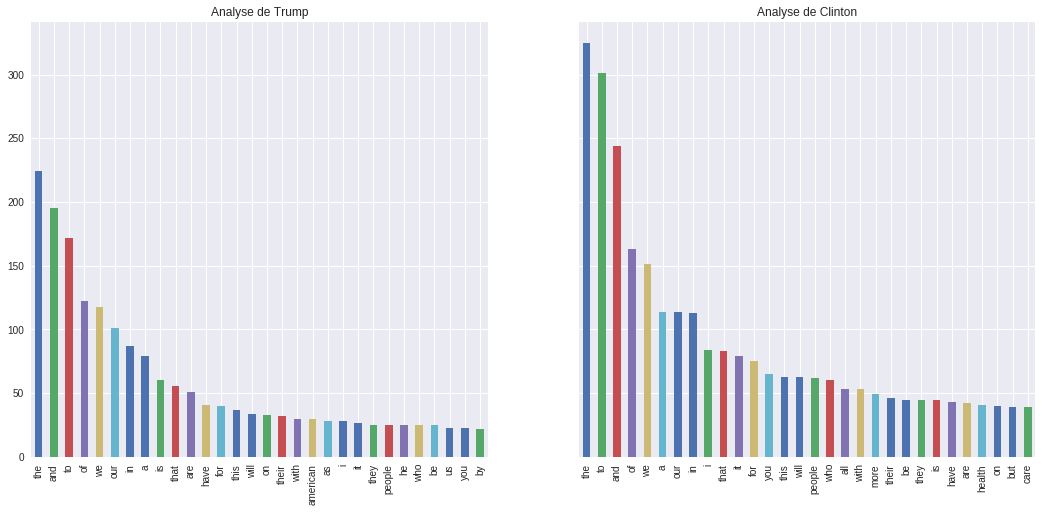

In [17]:
fig, (ax_g, ax_d) = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
trump_analyse[:30].plot(kind="bar", ax=ax_g)
ax_g.set_title("Analyse de Trump")
clinton_analyse[:30].plot(kind="bar", ax=ax_d)
ax_d.set_title("Analyse de Clinton")

On pourait chercher à se débarasser des mots dont le contenu sémantique est négligeable de différentes façons, par exemple :
- En analysant un autre texte de nature différente et en enlevant les mots communs.
- En utilisant des fonctions de la librairie `nltk` (natural language toolkit).

On va juste ici ne conserver que les index communs aux deux, il serait également bon de renormaliser par le nombre total de mots utilisés.

In [20]:
trump_normalisee = 100*trump_analyse/trump_analyse.sum()
clinton_normalisee = 100*clinton_analyse/clinton_analyse.sum()

In [26]:
id_trump = trump_normalisee.index
id_clinton = clinton_normalisee.index

In [27]:
mots_communs = id_trump.intersection(id_clinton)

In [28]:
mots_communs

Index(['the', 'and', 'to', 'of', 'we', 'our', 'in', 'a', 'is', 'that',
       ...
       'program', 'brought', 'presented', 'house', 'bipartisan', 'approach',
       'based', 'proposal', 'everything', 'critical'],
      dtype='object', length=673)

Text(0.5,1,'Analyse de Clinton')

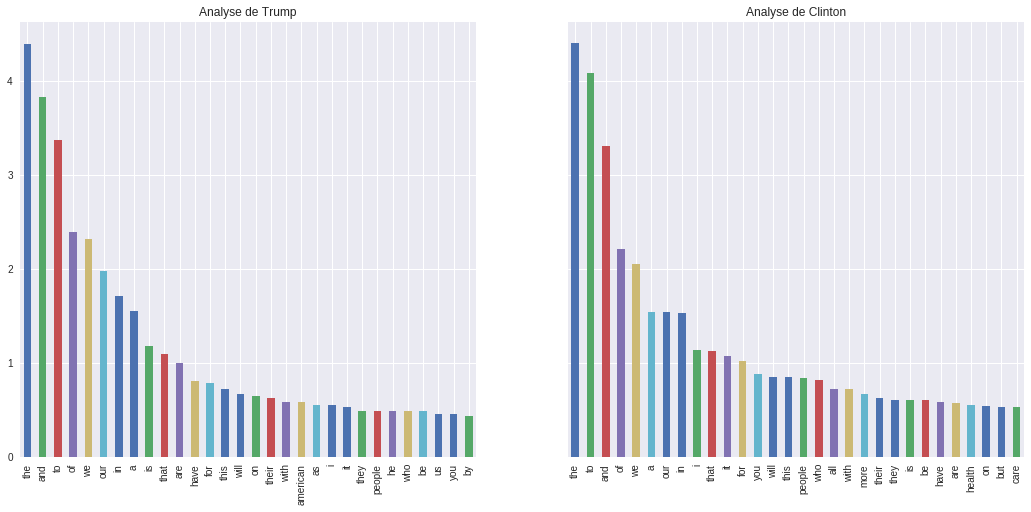

In [32]:
fig, (ax_g, ax_d) = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
trump_normalisee[mots_communs][:30].plot(kind="bar", ax=ax_g)
ax_g.set_title("Analyse de Trump")
clinton_normalisee[mots_communs].sort_values(ascending=False)[:30].plot(kind="bar", ax=ax_d)
ax_d.set_title("Analyse de Clinton")

# Scraping du site 

On veut récupérer les textes sans copier coller, on va utiliser la librairie `requests` pour aller récupérer la page web, puis la librairie `bs4` pour isoler le discours dans cette page.

In [33]:
from requests import get
from bs4 import BeautifulSoup as BS

In [34]:
url_trump = "https://millercenter.org/the-presidency/presidential-speeches/january-30-2018-state-union-address"
url_clinton = "https://millercenter.org/the-presidency/presidential-speeches/january-25-1994-state-union-address"

In [69]:
def recuperation_discours(url):
    page = get(url)
    soupe = BS(page.text)
    tag, = soupe.find_all("div", attrs={"class" : "transcript-inner"})
    texte = list()
    for st in tag.children:
        try:
            texte.append(st.text)
        except AttributeError:
            pass
    return "\n".join(texte)

In [70]:
essai_trump = recuperation_discours(url_trump)

In [71]:
print(essai_trump)

Transcript
Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and my fellow Americans:
Less than 1 year has passed since I first stood at this podium, in this majestic chamber, to speak on behalf of the American People—and to address their concerns, their hopes, and their dreams. That night, our new Administration had already taken swift action. A new tide of optimism was already sweeping across our land.
Each day since, we have gone forward with a clear vision and a righteous mission—to make America great again for all Americans.
Over the last year, we have made incredible progress and achieved extraordinary success. We have faced challenges we expected, and others we could never have imagined. We have shared in the heights of victory and the pains of hardship. We endured floods and fires and storms. But through it all, we have seen the beauty of America’s soul, and the steel in America’s spine.
Each test has forged new American heroes to remind